In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib import cm
import sys
import pdb
from copy import deepcopy
from tqdm import tqdm
import astropy.units as u
import mpl_scatter_density

import seaborn as sns
plt.style.use('seaborn')

/var/folders/d7/mj7t5gvn7kxcpnv91gn5rxs5myk4z8/T/ipykernel_89235/2184438354.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
sys.path.append('/Users/anh5866/Desktop/Coding')
import PyXFocus.sources as sources
import PyXFocus.transformations as trans
import PyXFocus.surfaces as surfaces
import PyXFocus.analyses as analyses
import PyXFocus.conicsolve as conicsolve

import OGRE.ogre_routines_alexplay as ogre

soxs : [WARNING  ] 2025-03-27 14:05:09,807 Setting 'soxs_data_dir' to /Users/anh5866/Library/Caches/soxs for this session. Please update your configuration if you want it somewhere else.


In [3]:
z0_first = 1860 * u.mm  # Focal length for reverse (f/4.0)
far_away = 1e5 * u.mm

#z0_first = (1860 - 465) * u.mm 


r_prim = 457.2/2 * u.mm  #18 inch diameter
#r_prim_rad = 1861.82 * u.mm #radius of curvature is 73.3 inches
r_prim_rad = 3720 * u.mm #radius of curvature is 73.3 inches

## maybe radius of curvature is wrong, understand 


wave = 405 * u.nm # wavelength of the LED

In [4]:
LED_to_pin = 6.6 #mm
pin_rad = 0.5 #mm -- note, Bridget has other sizes 
#pin_rad = 0.25 #mm -- note, Bridget has other sizes 

div = (np.tan(pin_rad/LED_to_pin)) #radians 
#divergence radius 
print(div)

0.07590283879738778


In [5]:
##### Define subannulus of rays.
rays = sources.circularbeam(300,100000)
#rays = sources.pointsource(0.00001, 100000)
#figure out what angle of divergence actually is, using trig. How big is pinhole, how far away, etc. 
# z distance of pinhole will effect the angle of divergence, won't it?

rays

[array([0., 0., 0., ..., 0., 0., 0.]),
 array([ 144.54733443,  161.89712651,  -15.10129934, ..., -248.99183562,
           2.5514406 , -144.34520636]),
 array([   9.35485298,   24.95011848, -132.90002017, ...,  -49.13031199,
          35.71158814,  -44.03213114]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([1., 1., 1., ..., 1., 1., 1.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.])]

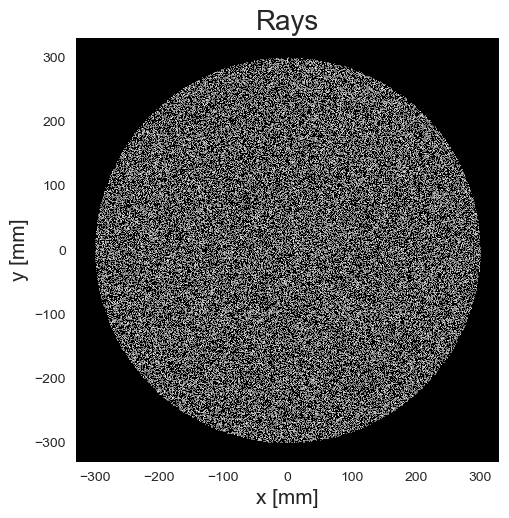

In [6]:
with sns.axes_style("ticks"):
#with sns.axes_style("whitegrid"):
    
    #matplotlib.rc('text',usetex=True)
    #matplotlib.rc('font',size=15)
    #fig1,ax1 = plt.subplots(figsize=(8,8))
    fig1,ax1 = plt.subplots()
    
    ax1.set_aspect('equal', adjustable='box')
    

    ax1.set_xlabel('x [mm]', fontsize=15)
    ax1.set_ylabel('y [mm]', fontsize=15)
    
    color_map = plt.get_cmap('plasma')
    ax1.set_facecolor('black')

    ax1.scatter(rays[1], rays[2], color="white", alpha=0.6, marker='.',  s=0.5)

    ax1.tick_params(axis='both',which='minor',direction='in')
    ax1.tick_params(top=True,right=True)
    ax1.tick_params(which='minor',top=True,right=True)
    
    #cbar = plt.colorbar(rays)
    #cbar.set_label('Ec', fontsize=15)

    ax1.set_title("Rays", fontsize=20)
    #ax1.grid()

In [7]:
trans.transform(rays, 0, 0, -far_away.to('mm').value, 0, 0, 0)
#surfaces.flat(rays)

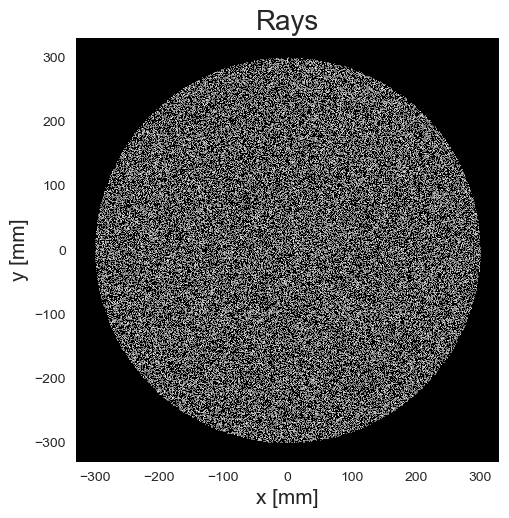

In [8]:
with sns.axes_style("ticks"):
#with sns.axes_style("whitegrid"):
    
    #matplotlib.rc('text',usetex=True)
    #matplotlib.rc('font',size=15)
    #fig1,ax1 = plt.subplots(figsize=(8,8))
    fig1,ax1 = plt.subplots()
    ax1.set_aspect('equal', adjustable='box')
    

    ax1.set_xlabel('x [mm]', fontsize=15)
    ax1.set_ylabel('y [mm]', fontsize=15)
    
    color_map = plt.get_cmap('plasma')
    ax1.set_facecolor('black')
    
    ax1.scatter(rays[1], rays[2], color="white", alpha=0.6, marker='.',  s=0.5)

    ax1.tick_params(axis='both',which='minor',direction='in')
    ax1.tick_params(top=True,right=True)
    ax1.tick_params(which='minor',top=True,right=True)
    
    #cbar = plt.colorbar(rays)
    #cbar.set_label('Ec', fontsize=15)

    ax1.set_title("Rays", fontsize=20)
    #ax1.grid()

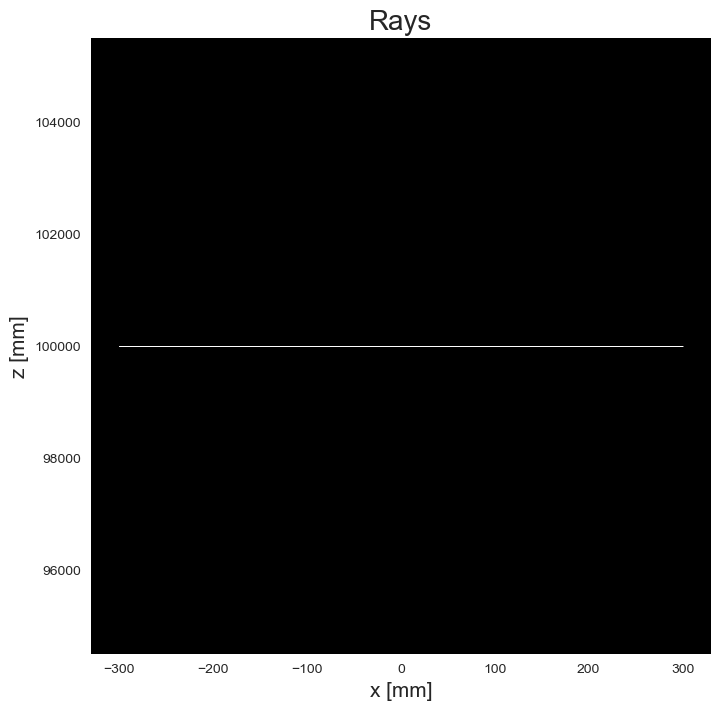

In [9]:
with sns.axes_style("ticks"):
#with sns.axes_style("whitegrid"):
    
    #matplotlib.rc('text',usetex=True)
    #matplotlib.rc('font',size=15)
    fig1,ax1 = plt.subplots(figsize=(8,8))
    

    ax1.set_xlabel('x [mm]', fontsize=15)
    ax1.set_ylabel('z [mm]', fontsize=15)
    
    color_map = plt.get_cmap('plasma')
    ax1.set_facecolor('black')
    
    ax1.scatter(rays[1], rays[3], color="white", alpha=0.6, marker='.',  s=0.5)

    ax1.tick_params(axis='both',which='minor',direction='in')
    ax1.tick_params(top=True,right=True)
    ax1.tick_params(which='minor',top=True,right=True)
    
    #cbar = plt.colorbar(rays)
    #cbar.set_label('Ec', fontsize=15)

    ax1.set_title("Rays", fontsize=20)
    #ax1.grid()

In [10]:
ind = np.where((np.sqrt(rays[1]**2 + rays[2]**2)) <= r_prim.to('mm').value)[0]
print(len(ind))
#does not illuminated entire primary mirror 

ind_rays = [r[ind] for r in rays]

rays = ind_rays

58155


In [11]:
surfaces.conic(rays, r_prim_rad.to('mm').value, -1)
trans.reflect(rays)

rays

[array([0., 0., 0., ..., 0., 0., 0.]),
 array([ 144.54733443,  161.89712651,  -15.10129934, ...,  118.64376208,
           2.5514406 , -144.34520636]),
 array([   9.35485298,   24.95011848, -132.90002017, ...,  -75.56677668,
          35.71158814,  -44.03213114]),
 array([2.82008672, 3.60661129, 2.40463234, ..., 2.6595    , 0.17228863,
        3.06107086]),
 array([ 0.07759597,  0.08687302, -0.0081085 , ...,  0.06369589,
         0.00137162, -0.07747744]),
 array([ 0.00502188,  0.01338808, -0.07135937, ..., -0.04056929,
         0.019198  , -0.02363429]),
 array([-0.99697224, -0.99612943, -0.99741771, ..., -0.99714441,
        -0.99981476, -0.99671393]),
 array([-0.03882739, -0.0434786 ,  0.00405687, ..., -0.03187071,
        -0.00068584,  0.03877058]),
 array([-0.00251284, -0.00670053,  0.03570274, ...,  0.02029914,
        -0.00959944,  0.01182687]),
 array([0.99924277, 0.99903189, 0.99935422, ..., 0.99928585, 0.99995369,
        0.99917815])]

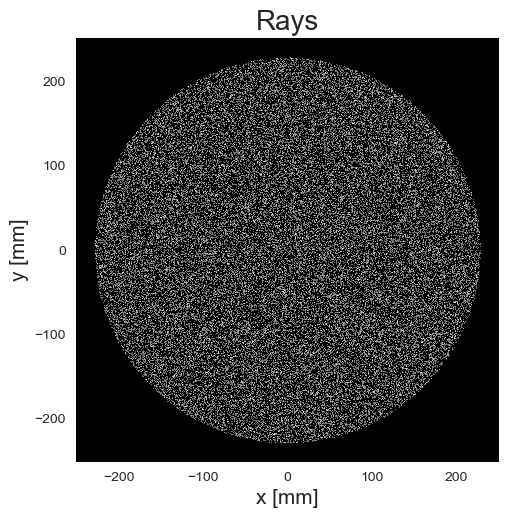

In [12]:
with sns.axes_style("ticks"):
#with sns.axes_style("whitegrid"):
    
    #matplotlib.rc('text',usetex=True)
    #matplotlib.rc('font',size=15)
    #fig1,ax1 = plt.subplots(figsize=(8,8))
    fig1,ax1 = plt.subplots()
    
    ax1.set_aspect('equal', adjustable='box')
    

    ax1.set_xlabel('x [mm]', fontsize=15)
    ax1.set_ylabel('y [mm]', fontsize=15)
    
    color_map = plt.get_cmap('plasma')
    ax1.set_facecolor('black')

    ax1.scatter(rays[1], rays[2], color="white", alpha=0.6, marker='.',  s=0.5)

    ax1.tick_params(axis='both',which='minor',direction='in')
    ax1.tick_params(top=True,right=True)
    ax1.tick_params(which='minor',top=True,right=True)
    
    #cbar = plt.colorbar(rays)
    #cbar.set_label('Ec', fontsize=15)

    ax1.set_title("Rays", fontsize=20)
    #ax1.grid()

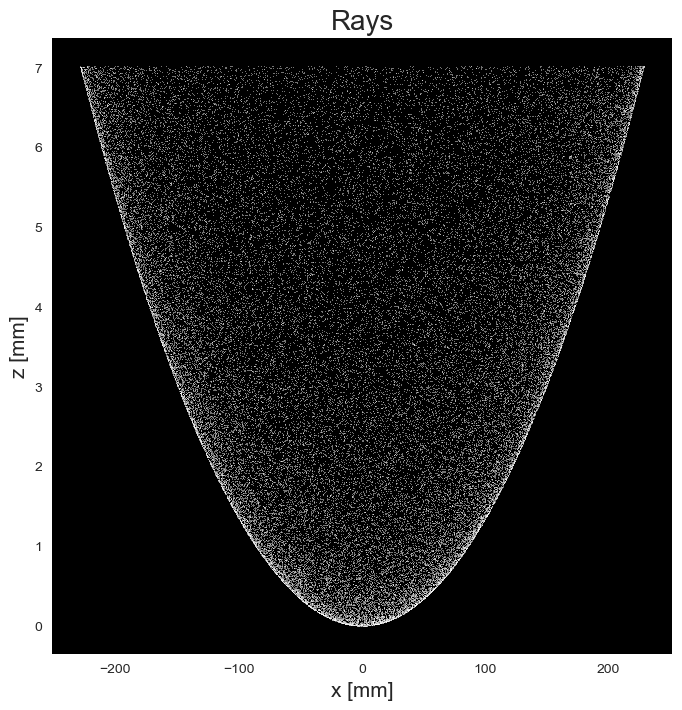

In [13]:
with sns.axes_style("ticks"):
#with sns.axes_style("whitegrid"):
    
    #matplotlib.rc('text',usetex=True)
    #matplotlib.rc('font',size=15)
    fig1,ax1 = plt.subplots(figsize=(8,8))
    #fig1,ax1 = plt.subplots()
    
    #ax1.set_aspect('equal', adjustable='box')
    

    ax1.set_xlabel('x [mm]', fontsize=15)
    ax1.set_ylabel('z [mm]', fontsize=15)
    
    color_map = plt.get_cmap('plasma')
    ax1.set_facecolor('black')

    ax1.scatter(rays[1], rays[3], color="white", alpha=0.6, marker='.',  s=0.5)

    ax1.tick_params(axis='both',which='minor',direction='in')
    ax1.tick_params(top=True,right=True)
    ax1.tick_params(which='minor',top=True,right=True)
    
    #cbar = plt.colorbar(rays)
    #cbar.set_label('Ec', fontsize=15)

    ax1.set_title("Rays", fontsize=20)
    #ax1.grid()

In [14]:
f0 = surfaces.focusX(rays) #put z to focus 
print(f0)

#length = 930.91 * u.mm #some chosen length away from the primary mirror. Random tbh 

#trans.transform(rays, 0, 0, length.to('mm').value, 0, 0, 0)
trans.transform(rays, 0, 0, f0, 0, 0, 0)
#surfaces.flat(rays)

1859.9999999088564


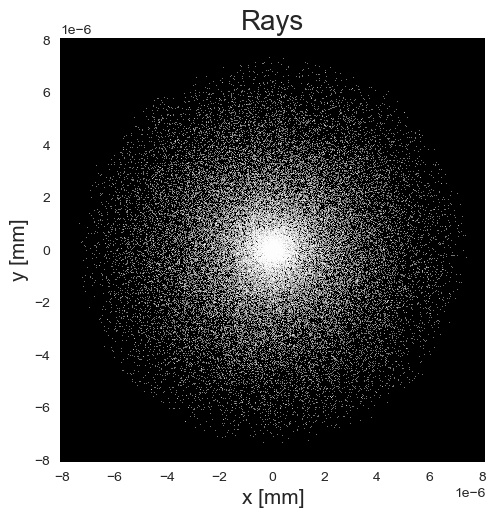

In [15]:
with sns.axes_style("ticks"):
#with sns.axes_style("whitegrid"):
    
    #matplotlib.rc('text',usetex=True)
    #matplotlib.rc('font',size=15)
    #fig1,ax1 = plt.subplots(figsize=(8,8))
    fig1,ax1 = plt.subplots()
    ax1.set_aspect('equal', adjustable='box')
    

    ax1.set_xlabel('x [mm]', fontsize=15)
    ax1.set_ylabel('y [mm]', fontsize=15)
    
    color_map = plt.get_cmap('plasma')
    ax1.set_facecolor('black')

    ax1.scatter(rays[1], rays[2], color="white", alpha=0.6, marker='.',  s=0.5)

    ax1.tick_params(axis='both',which='minor',direction='in')
    ax1.tick_params(top=True,right=True)
    ax1.tick_params(which='minor',top=True,right=True)
    
    #cbar = plt.colorbar(rays)
    #cbar.set_label('Ec', fontsize=15)

    ax1.set_title("Rays", fontsize=20)
    #ax1.grid()